# Install our Eva repository

In [ ]:
! pip install --upgrade git+https://github.com/romesharon/eva.git

# Utils for results

In [ ]:
eva_tests_tracking = {}
eva_tests_mse = {}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_eva_test_tracking(data_set: str):
  sd = eva_tests_tracking[data_set]
  # Extract the unique keys
  keys = np.unique([key for d in sd for key in sd[d].keys()])
  # Extract the values for each key
  values = {test_name: list({metric_name: metrics.get(metric_name, -1) for metric_name in keys}.values()) for test_name, metrics in sd.items()}

  x = np.arange(len(keys))
  width = 0.25  # the width of the bars
  multiplier = 0
  fig, ax = plt.subplots(layout='constrained')

  for test_name, metrics_values in values.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, metrics_values, width, label=test_name)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Score')
  ax.set_title(data_set)
  ax.set_xticks(x + width, keys)
  ax.legend(loc='upper left')
  ax.set_ylim(0, 1)
  fig.set_size_inches(20, 10)

def plot_eva_mse(dataset_name):
  test = eva_tests_mse[dataset_name]
  x = 0
  width = 0.1  # the width of the bars
  multiplier = 0
  fig, ax = plt.subplots(layout='constrained')
  for test_name, values in test.items():
      offset = width * multiplier
      rects = ax.bar(test_name, values[0], width, label=test_name)
      ax.bar_label(rects, padding=3)
      multiplier += 1
      ax.axhline(values[1],ls='--').set_label(f'{test_name} threshold')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Score')
  ax.set_title(f'mse score for {dataset_name} performed tests')
  # ax.set_xticklabels( set(values.keys()))
  ax.legend(loc='upper right', prop={'size': 6})
  ax.set_ylim(0, 1)
  fig.set_size_inches(3.25, 10)

def plot_eva_metric(metric_name, threshold):
  # Extract the values for each key
  # values = {test_name: list({metric_name: metrics.get(metric_name, -1) for metric_name in keys}.values()) for _, sd in eva_tests_tracking.items() for test_name, metrics in sd.items()}
  values = {f'{dataset}\n{test_name}': metrics.get(metric_name, -1) for dataset, sd in eva_tests_tracking.items() for test_name, metrics in sd.items()}
  print(values)
  # x = np.arange(len(eva_tests_tracking.keys()))
  x = 0
  width = 0.1  # the width of the bars
  multiplier = 0
  fig, ax = plt.subplots(layout='constrained')
  l1=ax.axhline(threshold, color='red',ls='--')
  l1.set_label('threshold')

  for test_name, v in values.items():
      offset = width * multiplier
      rects = ax.bar(test_name, v, width, label=test_name)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Score')
  ax.set_title(f'{metric_name} score for all 12 performed tests')
  # ax.set_xticklabels( set(values.keys()))
  # ax.legend(loc='lower right', prop={'size': 6})
  ax.set_ylim(0, 1)
  fig.set_size_inches(13, 10)

# Rebalance function
will use to balance the train data (for test3)

In [ ]:
def rebalance(X_train, y_train):
    """
    Resamples the training data to balance the classes.

    Args:
    X_train: numpy array, training features
    y_train: numpy array, training labels

    Returns:
    X_resampled: numpy array, resampled features
    y_resampled: numpy array, resampled labels
    """

    # Get indices of samples for each class
    indices_0 = np.where(y_train == 0)[0]
    indices_1 = np.where(y_train == 1)[0]

    # Get number of samples in each class
    n_samples_0 = len(indices_0)
    n_samples_1 = len(indices_1)

    # Determine class with fewer samples
    minority_class = 0 if n_samples_0 < n_samples_1 else 1

    # Upsample minority class
    minority_indices = indices_0 if minority_class == 1 else indices_1
    majority_indices = indices_1 if minority_class == 1 else indices_0
    minority_samples = X_train.iloc[minority_indices.tolist()]
    minority_labels = y_train.iloc[minority_indices.tolist()]
    majority_samples = X_train.iloc[majority_indices.tolist()]
    majority_labels = y_train.iloc[majority_indices.tolist()]
    minority_samples_resampled, minority_labels_resampled = resample(minority_samples, minority_labels,
                                                                     replace=True, n_samples=len(majority_labels))

    # Concatenate resampled minority class with majority class
    X_resampled = np.concatenate((majority_samples, minority_samples_resampled), axis=0)
    y_resampled = np.concatenate((majority_labels, minority_labels_resampled), axis=0)

    return X_resampled, y_resampled

# Dataset - Surogical Deepnet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import resample

data=pd.read_csv('https://drive.google.com/uc?id=1Av2yU0e5e0FNgnhHceCYv8kVnubJXa3i&export=download')
data.dropna(inplace=True)

y=data['complication'].copy()
X=data.drop('complication', axis=1).copy()

## Test 1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Meric Name:Accuracy, value: 0.791595490263068
The metric Accuracy not perform well
Accuracy calculates the proportion of correct predictions out of all the predictions made by the model.
Try to use a more complex model or to add more data to the training set, in addition, you can try to tune your hyperparametrs in order to get a better performance. 


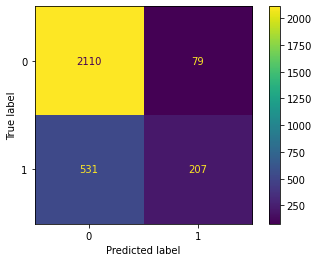

Meric Name:Precision, value: 0.7237762237762237
The metric Precision not perform well
Precision measures how many observations predicted as positive are in fact positive.
Try to adjust the decision threshold of your model to improve the precision score of your binary classification task. Lowering the threshold can increase the number of true positives but may also increase false positives, while raising the threshold can decrease false positives but may also decrease true positives 


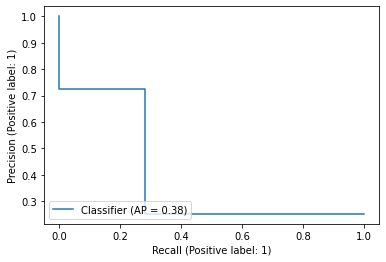

Meric Name:Recall, value: 0.2804878048780488
The metric Recall not perform well
Recall calculates the proportion of true positive predictions out of all the actual positive instances.
Try to increase the size of your dataset or apply data augmentation techniques. Increasing the size of your dataset can provide more examples of the positive class, which can improve the model's ability to identify true positives. 
Meric Name:F1 score, value: 0.404296875
The metric F1 score not perform well
F1 score is an harmonic mean of precision and recall. It is commonly used when the dataset is imbalanced. 
Try to balance precision and recall to improve F1 score by adjusting the decision threshold of your model or using algorithms that are specifically designed to optimize the F1 score. 


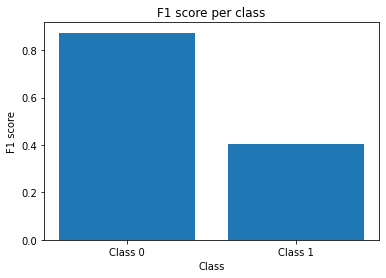

Meric Name:Matthew's Correlation Coefficient (MCC), value: 0.3574225634645824
Meric Name:Mean Squared Error (MSE), value: 0.208404509736932
The metric Mean Squared Error (MSE) not perform well
Mean Squared Error (MSE) is a popular regression metric which measures the average squared difference between the true and predicted values. 
Try to use more complex models like neural networks or gradient boosting to improve the Mean Squared Error (MSE) metric. These models can capture complex nonlinear relationships in the data and improve predictive accuracy. 
Meric Name:Brier Score, value: 0.1466668280540428
Meric Name:AUC (Area Under the ROC Curve), value: 0.6221991331379737
The metric AUC (Area Under the ROC Curve) not perform well
AUC (Area Under the ROC Curve) calculates the area under the ROC curve, which plots the true positive rate against the false positive rate, the closer to 1, the better. A score of 0.5 is equivalent to random guessing. 
Try to use algorithms that directly optimize

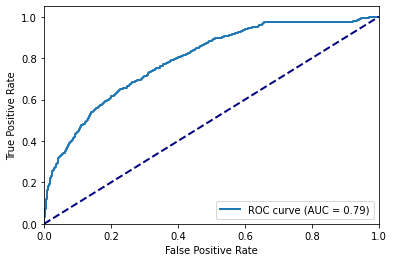

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)
model2=LogisticRegression(solver='saga')
model2.fit(X_train, y_train)
y_pred_first_test = model2.predict(X_test.values)
y_proba_first_test = model2.predict_proba(X_test.values)[:,1]

from eva import Eva
eva_tests_tracking['surogical'] = {}
eva_tests_mse['surogical'] = {}
eva = Eva(y_true=y_test, y_pred=y_pred_first_test, y_prob=y_proba_first_test)
metrics = eva.evaluate()
eva_tests_mse['surogical']['test1'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)
eva_tests_tracking['surogical']['test1'] = metrics

## Test 2


Meric Name:Accuracy, value: 0.7818098997874279
The metric Accuracy not perform well
Accuracy calculates the proportion of correct predictions out of all the predictions made by the model.
Try to use a more complex model or to add more data to the training set, in addition, you can try to tune your hyperparametrs in order to get a better performance. 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


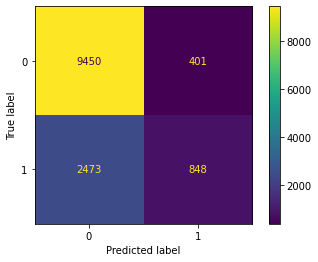

Meric Name:Precision, value: 0.6789431545236189
The metric Precision not perform well
Precision measures how many observations predicted as positive are in fact positive.
Try to adjust the decision threshold of your model to improve the precision score of your binary classification task. Lowering the threshold can increase the number of true positives but may also increase false positives, while raising the threshold can decrease false positives but may also decrease true positives 


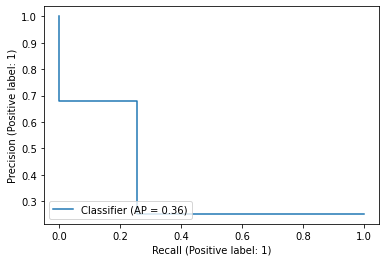

Meric Name:Recall, value: 0.25534477566997893
The metric Recall not perform well
Recall calculates the proportion of true positive predictions out of all the actual positive instances.
Try to increase the size of your dataset or apply data augmentation techniques. Increasing the size of your dataset can provide more examples of the positive class, which can improve the model's ability to identify true positives. 
Meric Name:F1 score, value: 0.3711159737417943
The metric F1 score not perform well
F1 score is an harmonic mean of precision and recall. It is commonly used when the dataset is imbalanced. 
Try to balance precision and recall to improve F1 score by adjusting the decision threshold of your model or using algorithms that are specifically designed to optimize the F1 score. 


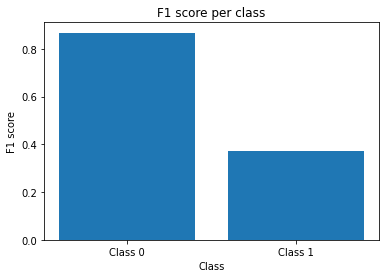

Meric Name:Matthew's Correlation Coefficient (MCC), value: 0.3181322680791216
The metric Matthew's Correlation Coefficient (MCC) not perform well
Matthew's Correlation Coefficient (MCC) measures the quality of a binary classification by taking into account true positives, true negatives, false positives, and false negatives and it is commonly used when the dataset is imbalanced. A high value for MCC (close to 1) indicates good performance, while a low value (close to 0 or below) indicates poor performance. 
Try to use more complex models like neural networks or gradient boosting to improve the Mean Squared Error (MSE) metric. These models can capture complex nonlinear relationships in the data and improve predictive accuracy. 
Meric Name:Mean Squared Error (MSE), value: 0.21819010021257212
The metric Mean Squared Error (MSE) not perform well
Mean Squared Error (MSE) is a popular regression metric which measures the average squared difference between the true and predicted values. 
Try 

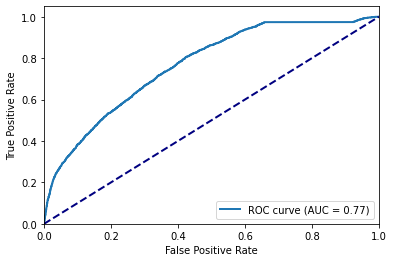

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.1,test_size=0.9,random_state=0)
model2=LogisticRegression(solver='saga')
model2.fit(X_train, y_train)
y_pred_third_test = model2.predict(X_test.values)
y_proba_third_test = model2.predict_proba(X_test.values)[:,1]

eva = Eva(y_true=y_test, y_pred=y_pred_third_test, y_prob=y_proba_third_test)
metrics = eva.evaluate()
eva_tests_tracking['surogical']['test2'] = metrics
eva_tests_mse['surogical']['test2'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

X_train_under, y_train_under = rebalance(X_train, y_train) 
model2=LogisticRegression(solver='saga')
model2.fit(X_train_under, y_train_under)
y_pred_second_test = model2.predict(X_test.values)
y_proba_second_test = model2.predict_proba(X_test.values)[:,1]

eva = Eva(y_true=y_test, y_pred=y_pred_second_test, y_prob=y_proba_second_test)
metrics = eva.evaluate()
eva_tests_tracking['surogical']['test3'] = metrics
eva_tests_mse['surogical']['test3'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 4


In [ ]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

model2=XGBClassifier()
model2.fit(X_train, y_train)
y_pred_first_test = model2.predict(X_test.values)
y_proba_first_test = model2.predict_proba(X_test.values)[:,1]
eva = Eva(y_true=y_test, y_pred=y_pred_first_test, y_prob=y_proba_first_test)
metrics = eva.evaluate()
eva_tests_tracking['surogical']['test4'] = metrics
eva_tests_mse['surogical']['test4'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

#Dataset - Brest Cancer

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv('https://drive.google.com/uc?id=1njOBv9DzYvRB8ivXjvevnI80mq6NfUv3&export=download', skipinitialspace=True)
# df.info()
df.drop("Unnamed: 32", axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
df['Malignant'] = pd.get_dummies(df['diagnosis'], drop_first = True)
df['diagnosis']=pd.Categorical(df['diagnosis'])

## Test 1

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_proba = model.predict_proba(X_test_std)[:,1]

eva_tests_tracking['b_cancer'] = {}
eva_tests_mse['b_cancer'] = {}
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_proba)
metrics = eva.evaluate()
eva_tests_tracking['b_cancer']['test1'] = metrics
eva_tests_mse['b_cancer']['test1'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 2

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
df['Malignant'] = pd.get_dummies(df['diagnosis'], drop_first = True)
df['diagnosis']=pd.Categorical(df['diagnosis'])

model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_proba = model.predict_proba(X_test_std)[:,1]

eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_proba)
metrics = eva.evaluate()
eva_tests_tracking['b_cancer']['test2'] = metrics
eva_tests_mse['b_cancer']['test2'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 3

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = rebalance(X_train, y_train)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
df['Malignant'] = pd.get_dummies(df['diagnosis'], drop_first = True)
df['diagnosis']=pd.Categorical(df['diagnosis'])

model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_proba = model.predict_proba(X_test_std)[:,1]

eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_proba)
metrics = eva.evaluate()
eva_tests_tracking['b_cancer']['test3'] = metrics
eva_tests_mse['b_cancer']['test3'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 4

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
df['Malignant'] = pd.get_dummies(df['diagnosis'], drop_first = True)
df['diagnosis']=pd.Categorical(df['diagnosis'])

model = XGBClassifier()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_proba = model.predict_proba(X_test_std)[:,1]

eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_proba)
metrics = eva.evaluate()
eva_tests_tracking['b_cancer']['test4'] = metrics
eva_tests_mse['b_cancer']['test4'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

# Dataset - Titanic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

seed = 1301

path = 'https://drive.google.com/uc?id=1GSAY_lBPEZGcXB1F0DADR9t7xuab11kI&export=download'
data = pd.read_csv(path)
data.dropna(inplace=True)

data.head()
###to get train and test
def split_data(data,target,drop,test_size=0.2,seed=seed):
    
    return train_test_split(data.dropna().drop(target+drop,axis=1),
                            data.dropna()[target],
                            test_size=test_size,
                            random_state = seed)
    
drop,target  = ['Passengerid'],['2urvived']

## Test 1

In [ ]:
X_train,X_test,y_train,y_test = split_data(data,target,drop=drop)
tcl = LogisticRegression()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva_tests_tracking['titanic'] = {}
eva_tests_mse['titanic'] ={}
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['titanic']['test1'] = metrics
eva_tests_mse['titanic']['test1'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 2

Meric Name:Accuracy, value: 0.7442650807136788
The metric Accuracy not perform well
Accuracy calculates the proportion of correct predictions out of all the predictions made by the model.
Try to use a more complex model or to add more data to the training set, in addition, you can try to tune your hyperparametrs in order to get a better performance. 


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


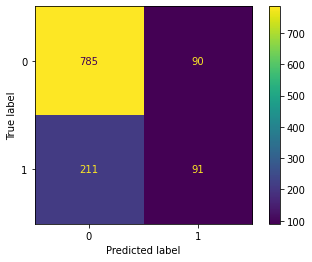

Meric Name:Precision, value: 0.5027624309392266
The metric Precision not perform well
Precision measures how many observations predicted as positive are in fact positive.
Try to adjust the decision threshold of your model to improve the precision score of your binary classification task. Lowering the threshold can increase the number of true positives but may also increase false positives, while raising the threshold can decrease false positives but may also decrease true positives 


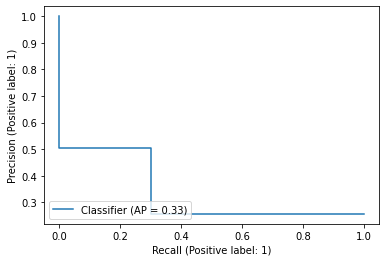

Meric Name:Recall, value: 0.30132450331125826
The metric Recall not perform well
Recall calculates the proportion of true positive predictions out of all the actual positive instances.
Try to increase the size of your dataset or apply data augmentation techniques. Increasing the size of your dataset can provide more examples of the positive class, which can improve the model's ability to identify true positives. 
Meric Name:F1 score, value: 0.37681159420289856
The metric F1 score not perform well
F1 score is an harmonic mean of precision and recall. It is commonly used when the dataset is imbalanced. 
Try to balance precision and recall to improve F1 score by adjusting the decision threshold of your model or using algorithms that are specifically designed to optimize the F1 score. 


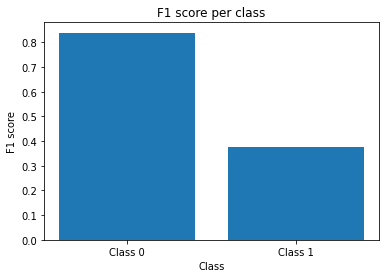

Meric Name:Matthew's Correlation Coefficient (MCC), value: 0.24028553926378
The metric Matthew's Correlation Coefficient (MCC) not perform well
Matthew's Correlation Coefficient (MCC) measures the quality of a binary classification by taking into account true positives, true negatives, false positives, and false negatives and it is commonly used when the dataset is imbalanced. A high value for MCC (close to 1) indicates good performance, while a low value (close to 0 or below) indicates poor performance. 
Try to use more complex models like neural networks or gradient boosting to improve the Mean Squared Error (MSE) metric. These models can capture complex nonlinear relationships in the data and improve predictive accuracy. 
Meric Name:Mean Squared Error (MSE), value: 0.25573491928632114
The metric Mean Squared Error (MSE) not perform well
Mean Squared Error (MSE) is a popular regression metric which measures the average squared difference between the true and predicted values. 
Try to

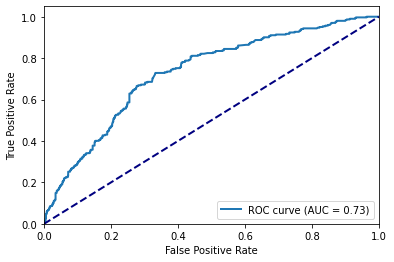

In [ ]:
X_train,X_test,y_train,y_test = split_data(data,target,test_size=0.9, drop=drop)
tcl = LogisticRegression()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['titanic']['test2'] = metrics
eva_tests_mse['titanic']['test2'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 3

In [ ]:
X_train,X_test,y_train,y_test = split_data(data,target, drop=drop)
tcl = LogisticRegression()
X_train, y_train = rebalance(X_train, y_train)
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['titanic']['test3'] = metrics
eva_tests_mse['titanic']['test3'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 4

Meric Name:Accuracy, value: 0.8015267175572519
The metric Accuracy not perform well
Accuracy calculates the proportion of correct predictions out of all the predictions made by the model.
Try to use a more complex model or to add more data to the training set, in addition, you can try to tune your hyperparametrs in order to get a better performance. 


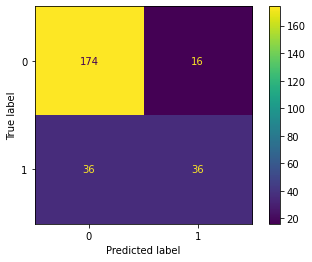

Meric Name:Precision, value: 0.6923076923076923
The metric Precision not perform well
Precision measures how many observations predicted as positive are in fact positive.
Try to adjust the decision threshold of your model to improve the precision score of your binary classification task. Lowering the threshold can increase the number of true positives but may also increase false positives, while raising the threshold can decrease false positives but may also decrease true positives 


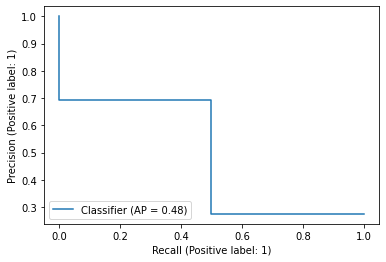

Meric Name:Recall, value: 0.5
The metric Recall not perform well
Recall calculates the proportion of true positive predictions out of all the actual positive instances.
Try to increase the size of your dataset or apply data augmentation techniques. Increasing the size of your dataset can provide more examples of the positive class, which can improve the model's ability to identify true positives. 
Meric Name:F1 score, value: 0.5806451612903226
The metric F1 score not perform well
F1 score is an harmonic mean of precision and recall. It is commonly used when the dataset is imbalanced. 
Try to balance precision and recall to improve F1 score by adjusting the decision threshold of your model or using algorithms that are specifically designed to optimize the F1 score. 


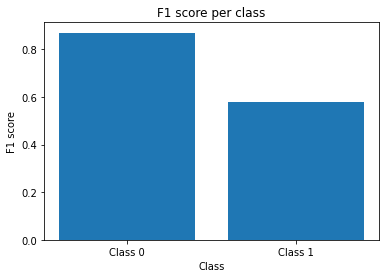

Meric Name:Matthew's Correlation Coefficient (MCC), value: 0.46537732596617115
Meric Name:Mean Squared Error (MSE), value: 0.1984732824427481
Meric Name:Brier Score, value: 0.13142114678453948
Meric Name:AUC (Area Under the ROC Curve), value: 0.7078947368421052
The metric AUC (Area Under the ROC Curve) not perform well
AUC (Area Under the ROC Curve) calculates the area under the ROC curve, which plots the true positive rate against the false positive rate, the closer to 1, the better. A score of 0.5 is equivalent to random guessing. 
Try to use algorithms that directly optimize AUC to improve the AUC metric of your binary classification task. The ROC-AUC maximization algorithm is one such approach that can directly optimize AUC metric score. 


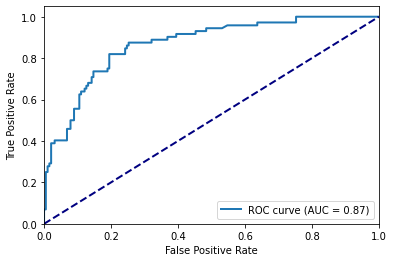

In [ ]:
X_train,X_test,y_train,y_test = split_data(data,target, drop=drop)
tcl = XGBClassifier()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['titanic']['test4'] = metrics
eva_tests_mse['titanic']['test4'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

# Dataset - College

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=11f0lLHvbDCqR2lAX-BujyDmdkcdzd45H&export=download')
df.isnull().any()
df["type_school"]=df['type_school'].map({'Academic': 0,'Vocational': 1})
df["school_accreditation"]=df["school_accreditation"].map({'A': 0,'B': 1})
df["gender"]=df["gender"].map({'Male': 0,'Female': 1})
df["interest"]=df["interest"].map({'Very Interested': 0,'Uncertain': 1,'Less Interested':2,'Quiet Interested':3, 'Not Interested':4})
df["residence"]=df["residence"].map({'Urban':0,'Rural': 1})
df["parent_was_in_college"] = df["parent_was_in_college"].astype(int)
df["will_go_to_college"] = df["will_go_to_college"].astype(int)
df.dropna(inplace=True)

X = df.drop(["will_go_to_college"], axis=1)
y = df["will_go_to_college"]
X, y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Test 1

In [ ]:
tcl = LogisticRegression()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva_tests_tracking['college'] = {}
eva_tests_mse['college'] = {}
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['college']['test1'] = metrics
eva_tests_mse['college']['test1'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 2

Meric Name:Accuracy, value: 0.5209876543209877
The metric Accuracy not perform well
Accuracy calculates the proportion of correct predictions out of all the predictions made by the model.
Try to use a more complex model or to add more data to the training set, in addition, you can try to tune your hyperparametrs in order to get a better performance. 


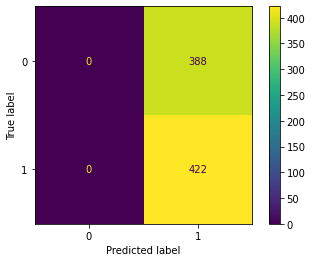

Meric Name:Precision, value: 0.5209876543209877
The metric Precision not perform well
Precision measures how many observations predicted as positive are in fact positive.
Try to adjust the decision threshold of your model to improve the precision score of your binary classification task. Lowering the threshold can increase the number of true positives but may also increase false positives, while raising the threshold can decrease false positives but may also decrease true positives 


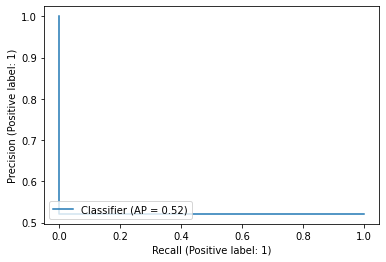

Meric Name:Recall, value: 1.0
Meric Name:F1 score, value: 0.6850649350649352
The metric F1 score not perform well
F1 score is an harmonic mean of precision and recall. It is commonly used when the dataset is imbalanced. 
Try to balance precision and recall to improve F1 score by adjusting the decision threshold of your model or using algorithms that are specifically designed to optimize the F1 score. 


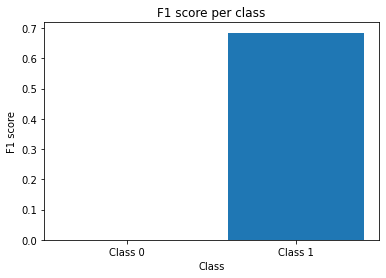

Meric Name:Matthew's Correlation Coefficient (MCC), value: nan
The metric Matthew's Correlation Coefficient (MCC) not perform well
Matthew's Correlation Coefficient (MCC) measures the quality of a binary classification by taking into account true positives, true negatives, false positives, and false negatives and it is commonly used when the dataset is imbalanced. A high value for MCC (close to 1) indicates good performance, while a low value (close to 0 or below) indicates poor performance. 
Try to use more complex models like neural networks or gradient boosting to improve the Mean Squared Error (MSE) metric. These models can capture complex nonlinear relationships in the data and improve predictive accuracy. 
Meric Name:Mean Squared Error (MSE), value: 0.47901234567901235
The metric Mean Squared Error (MSE) not perform well
Mean Squared Error (MSE) is a popular regression metric which measures the average squared difference between the true and predicted values. 
Try to use more com

/usr/local/lib/python3.9/dist-packages/eva/metrics/metrics.py:145: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator
/usr/local/lib/python3.9/dist-packages/eva/metrics/metrics.py:145: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


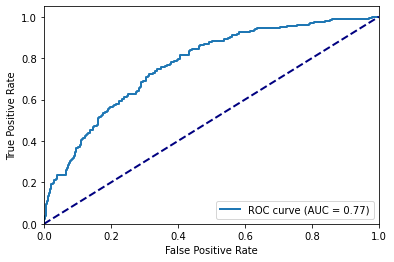

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

tcl = LogisticRegression()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['college']['test2'] = metrics
eva_tests_mse['college']['test2'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, y_train = rebalance(X_train, y_train)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

tcl = LogisticRegression()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['college']['test3'] = metrics
eva_tests_mse['college']['test3'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

## Test 4

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

tcl = XGBClassifier()
tcl.fit(X_train,y_train)
y_pred = tcl.predict(X_test)
y_prob = tcl.predict_proba(X_test)[:,1]

from eva import Eva
eva = Eva(y_true=y_test, y_pred=y_pred, y_prob=y_prob)
metrics = eva.evaluate()
eva_tests_tracking['college']['test4'] = metrics
eva_tests_mse['college']['test4'] = (metrics['Mean Squared Error (MSE)'], eva.metrics['mse_metric'].threshold)

# Printing MSE metric for each dataset
this metric is special bacuse each test have it's own threshold

[None, None, None, None]

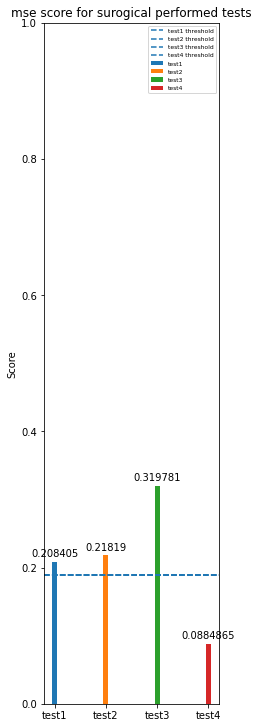

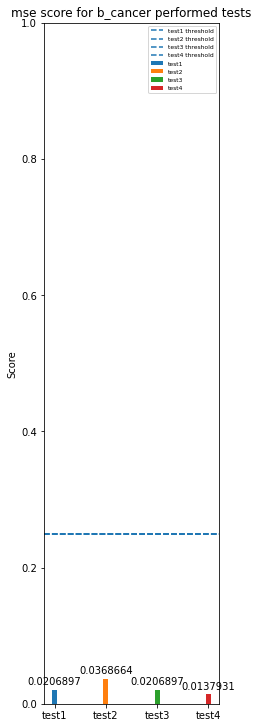

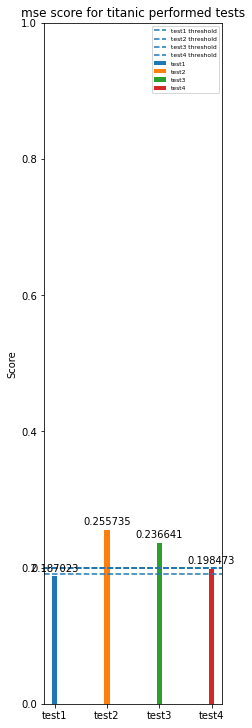

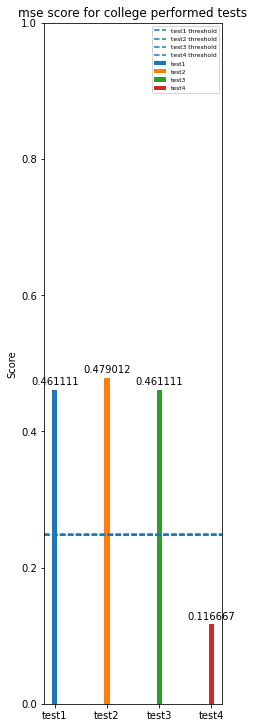

In [ ]:
from eva.metrics import AccuracyMetric
zeros = np.zeros(10)
dummy_eva = Eva(zeros, zeros, zeros)
[plot_eva_mse(dataset) for dataset in eva_tests_mse.keys()]

# Result for all metrics for all datasets

{'surogical\ntest1': 0.791595490263068, 'surogical\ntest2': 0.7818098997874279, 'surogical\ntest3': 0.6802186539118551, 'surogical\ntest4': 0.9115134950461223, 'b_cancer\ntest1': 0.9793103448275862, 'b_cancer\ntest2': 0.9631336405529954, 'b_cancer\ntest3': 0.9793103448275862, 'b_cancer\ntest4': 0.9862068965517241, 'titanic\ntest1': 0.8129770992366412, 'titanic\ntest2': 0.7442650807136788, 'titanic\ntest3': 0.7633587786259542, 'titanic\ntest4': 0.8015267175572519, 'college\ntest1': 0.5388888888888889, 'college\ntest2': 0.5209876543209877, 'college\ntest3': 0.5388888888888889, 'college\ntest4': 0.8833333333333333}
{'surogical\ntest1': 0.7237762237762237, 'surogical\ntest2': 0.6789431545236189, 'surogical\ntest3': 0.4238461538461539, 'surogical\ntest4': 0.9223985890652557, 'b_cancer\ntest1': 0.9855072463768116, 'b_cancer\ntest2': 0.9724770642201835, 'b_cancer\ntest3': 0.9855072463768116, 'b_cancer\ntest4': 0.9857142857142858, 'titanic\ntest1': 0.8108108108108109, 'titanic\ntest2': 0.50276

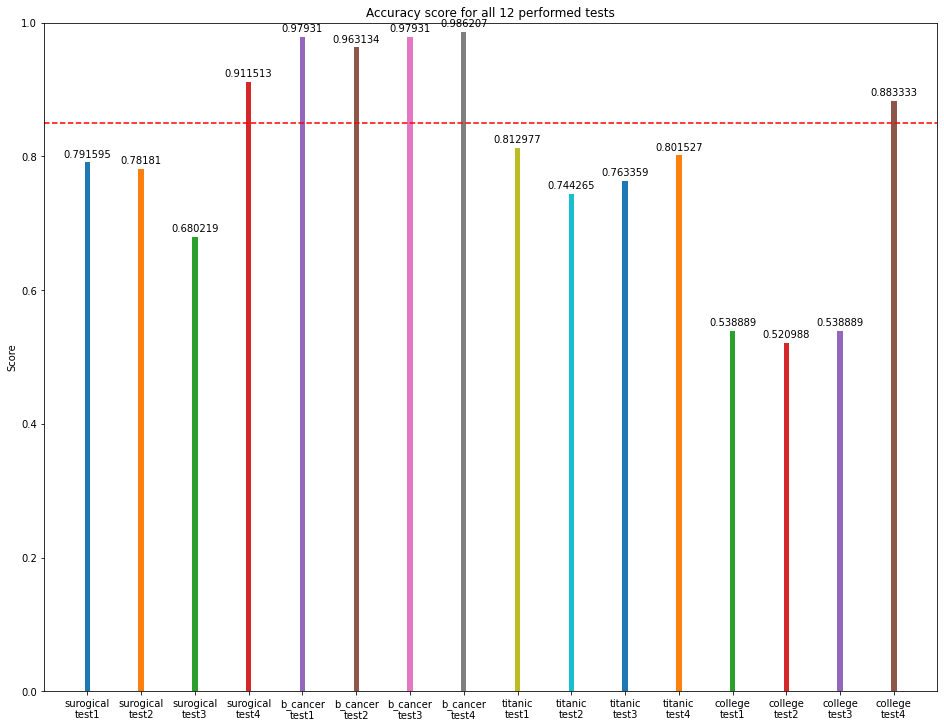

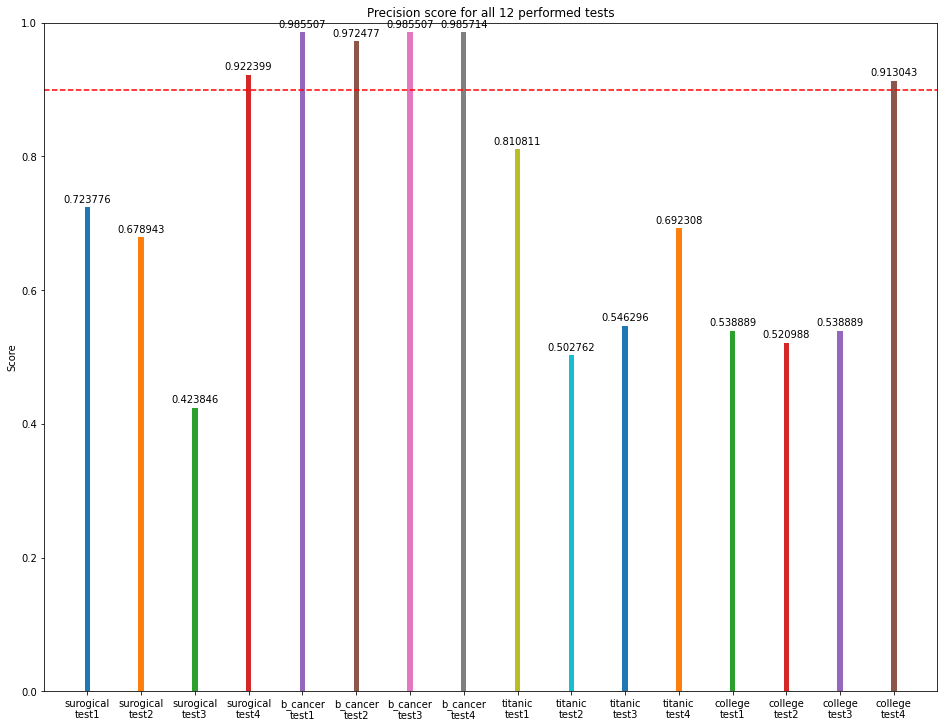

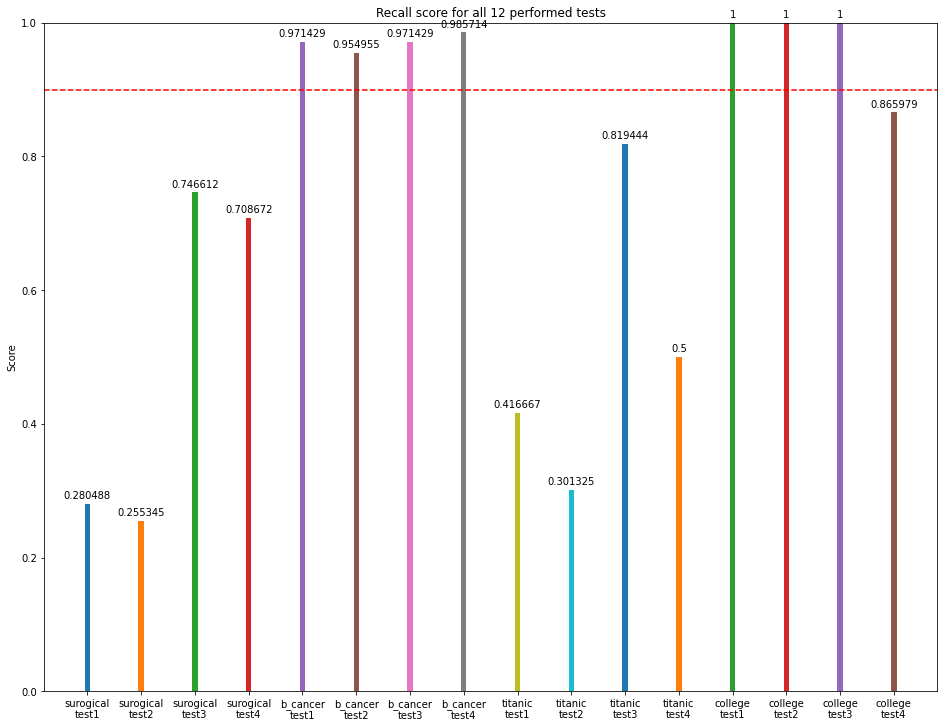

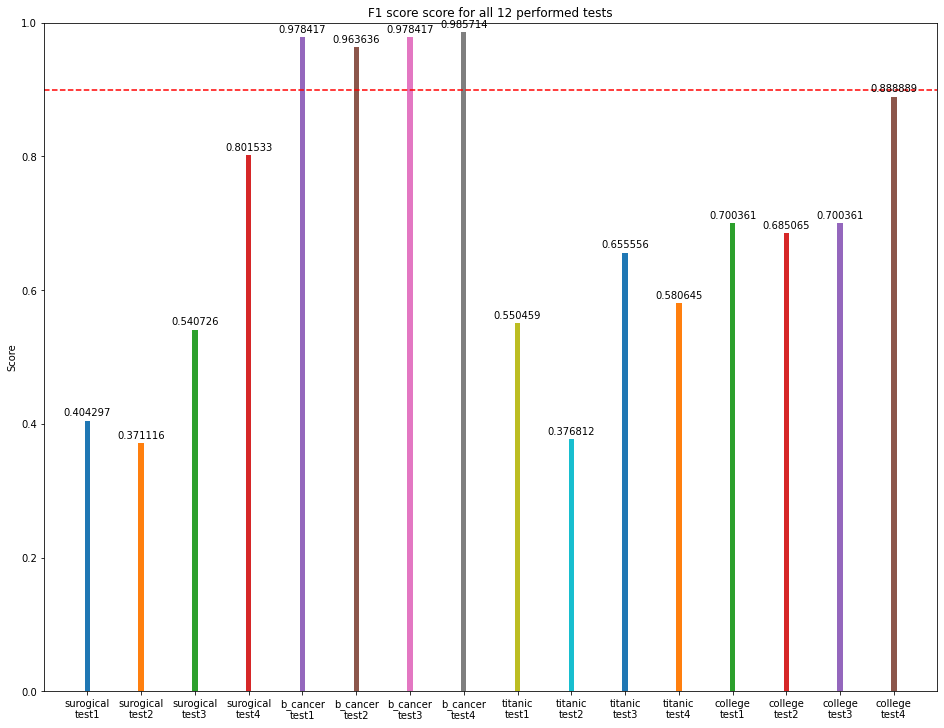

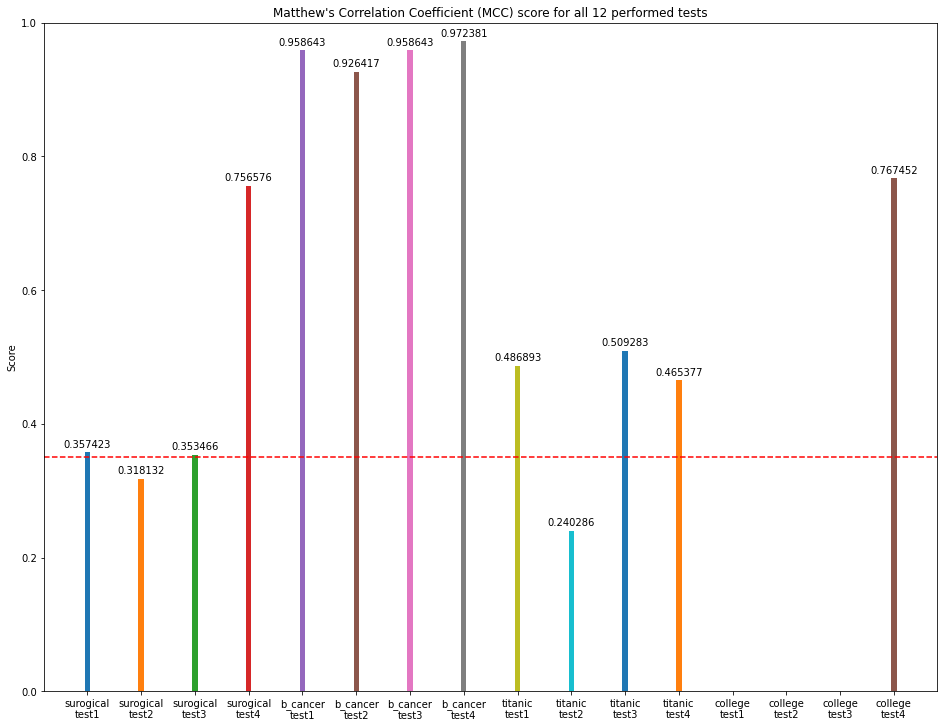

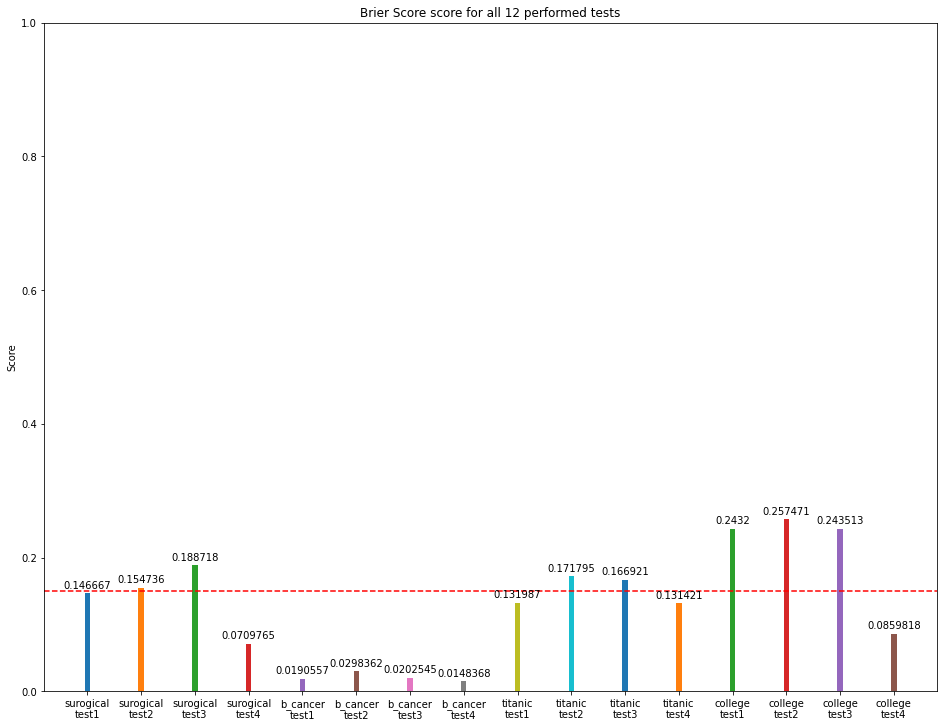

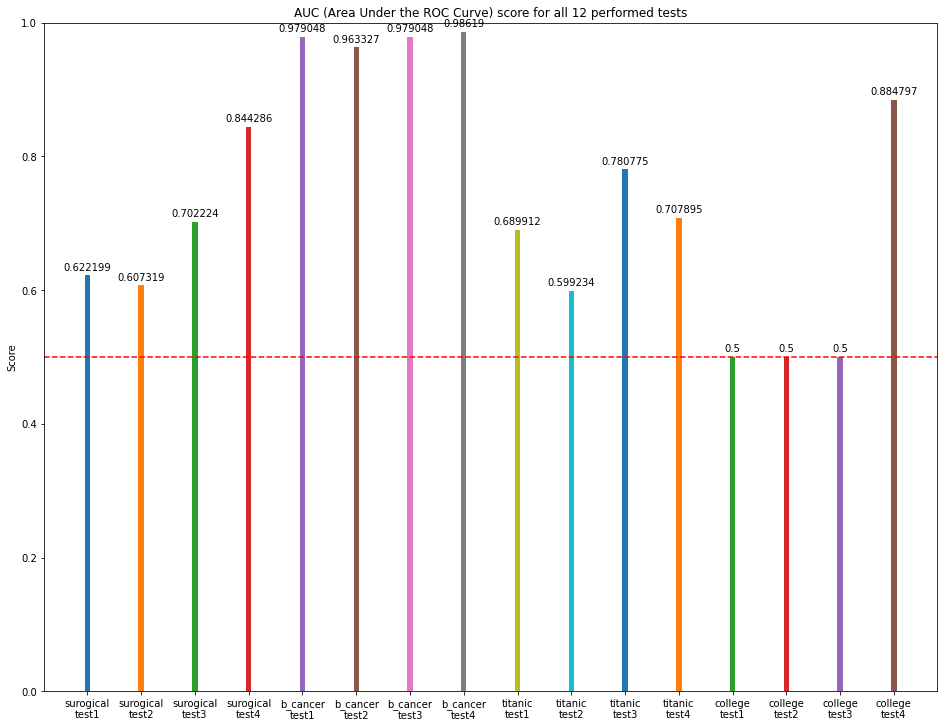

In [ ]:
del dummy_eva.metrics['mse_metric']
for _, metric in dummy_eva.metrics.items():
    plot_eva_metric(metric.name, metric.threshold['medium'])